# **Object Detection with MSCOCO Dataset with YOLOR**

## **1. Install YOLOR**

In [ ]:
# GPU 할당 체크
!nvidia-smi

Fri Jul 29 02:25:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 작업장소 생성 및 이동
!rm -rf /content/drive/MyDrive/yolor
!mkdir /content/drive/MyDrive/yolor
%cd /content/drive/MyDrive/yolor

/content/drive/MyDrive/yolor


In [ ]:
# Install YOLOR from GitHub
!git clone https://github.com/WongKinYiu/yolor
%cd yolor

# Install YOLOR
!pip install -qr requirements.txt

# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py build install
%cd ..

# Install PyTorch Wavelets
!git clone https://github.com/fbcotter/pytorch_wavelets
%cd pytorch_wavelets
!pip install .
%cd ..

%cd /content/drive/MyDrive/yolor

Cloning into 'yolor'...
remote: Enumerating objects: 492, done.
remote: Total 492 (delta 0), reused 0 (delta 0), pack-reused 492
Receiving objects: 100% (492/492), 3.42 MiB | 9.43 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/drive/MyDrive/yolor/yolor
     |████████████████████████████████| 596 kB 4.3 MB/s 
     |████████████████████████████████| 776.7 MB 4.7 kB/s 
     |████████████████████████████████| 12.7 MB 48.8 MB/s 
     |████████████████████████████████| 1.5 MB 49.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.7.0 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.7.0 which is incompatible.
fastai 2.7.7 requires torchvision>=0.8.2, but you have torchvision 0.8.1 which is incompatible.
Cloning into 'mish-cuda'...
remote: Enumera

## **2. YOLOR Weight 및 데이터 다운로드**

In [ ]:
!rm -rf dataset
!wget -O dataset.zip https://www.dropbox.com/s/oo007d0qd97ls2p/dataset_infer.zip?dl=1
!unzip dataset.zip -d dataset
!rm -rf dataset.zip

--2022-07-29 02:37:29--  https://www.dropbox.com/s/oo007d0qd97ls2p/dataset_infer.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/oo007d0qd97ls2p/dataset_infer.zip [following]
--2022-07-29 02:37:30--  https://www.dropbox.com/s/dl/oo007d0qd97ls2p/dataset_infer.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc86f7e02c5795bf478e88241bba.dl.dropboxusercontent.com/cd/0/get/Bp_Of9nRUKZXr6roYKXP0cCGZu43n4cNpccXhSh79JURQZ__xa1PPiE1CFsQB0zjolq4UlyIgjDJRpMdry5Rk61V4vxVJYICTBZrGGjCfKI8pDAxZ6L2KSfiuJyGD3zfQLaOari1-_gTwXTBafGywRtmQMoyGiHlZy_cNZfesZLWAg/file?dl=1# [following]
--2022-07-29 02:37:30--  https://uc86f7e02c5795bf478e88241bba.dl.dropboxusercontent.com/cd/0/get/Bp_Of9nRUKZXr6roYKXP0cCGZu43n4cNpccXhSh79JURQZ__

In [ ]:
# YOLOR-P6, W6, E6, D6
!wget -O yolor_p6.pt https://www.dropbox.com/s/ldyk3dzuuu3y9xx/yolor_p6.pt?dl=1
#!wget -O yolor_w6.pt https://www.dropbox.com/s/cqrxp1tlfk7sb51/yolor_w6.pt?dl=1
#!wget -O yolor_d6.pt https://www.dropbox.com/s/znl5pfwcyr8ylcb/yolor-d6.pt?dl=1
#!wget -O yolor_e6.py https://www.dropbox.com/s/ql8e89jwi6wewbc/yolor-e6.pt?dl=1

--2022-07-29 02:40:59--  https://www.dropbox.com/s/ldyk3dzuuu3y9xx/yolor_p6.pt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ldyk3dzuuu3y9xx/yolor_p6.pt [following]
--2022-07-29 02:40:59--  https://www.dropbox.com/s/dl/ldyk3dzuuu3y9xx/yolor_p6.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc60c3546b97d491fbc65c270f9.dl.dropboxusercontent.com/cd/0/get/Bp-5g75ad255bJ5HHRr4stSEWAzSOsvlHQ2_kl-Wwvp9uiOs6OUV5kFOm0v3EsdGyFVKvXWmJCzJKCqOWHvAuQw-5GLxugBJ2TwBRwRdL-ftyJP45IbhOFq15kVFvdu7R_YmPz4l3KugstkFYlvBUlyYyayAHOEwwPk8YC8kveYtGg/file?dl=1# [following]
--2022-07-29 02:41:00--  https://ucc60c3546b97d491fbc65c270f9.dl.dropboxusercontent.com/cd/0/get/Bp-5g75ad255bJ5HHRr4stSEWAzSOsvlHQ2_kl-Wwvp9uiOs6OUV5kFOm0v3EsdGyF

## **2. YOLOR 이미지 추론 (MS-COCO 데이터셋)**

In [ ]:
in_path = "dataset/images/"
out_path = "dataset/images/outputs/"

# Inference using YOLOR
!python yolor/detect.py --source $in_path \
                --output $out_path \
                --cfg yolor/cfg/yolor_p6.cfg \
                --weights yolor_p6.pt \
                --names yolor/data/coco.names \
                --conf 0.5 \
                --img-size 1280 \
                --device 0

Namespace(agnostic_nms=False, augment=False, cfg='yolor/cfg/yolor_p6.cfg', classes=None, conf_thres=0.5, device='0', img_size=1280, iou_thres=0.5, names='yolor/data/coco.names', output='dataset/images/outputs/', save_txt=False, source='dataset/images/', update=False, view_img=False, weights=['yolor_p6.pt'])
image 1/4 /content/drive/MyDrive/yolor/dataset/images/test_01.jpg: 896x1280 7 persons, Done. (0.045s)
image 2/4 /content/drive/MyDrive/yolor/dataset/images/test_02.jpg: 1280x960 3 persons, 1 bicycles, 1 buss, Done. (0.046s)
image 3/4 /content/drive/MyDrive/yolor/dataset/images/test_03.jpg: 896x1280 16 cars, 2 benchs, Done. (0.042s)
image 4/4 /content/drive/MyDrive/yolor/dataset/images/test_04.jpg: 768x1280 2 persons, 1 ties, Done. (0.039s)
Results saved to dataset/images/outputs
Done. (0.453s)


Matplotlib을 활용한 추론된 이미지 불러오기

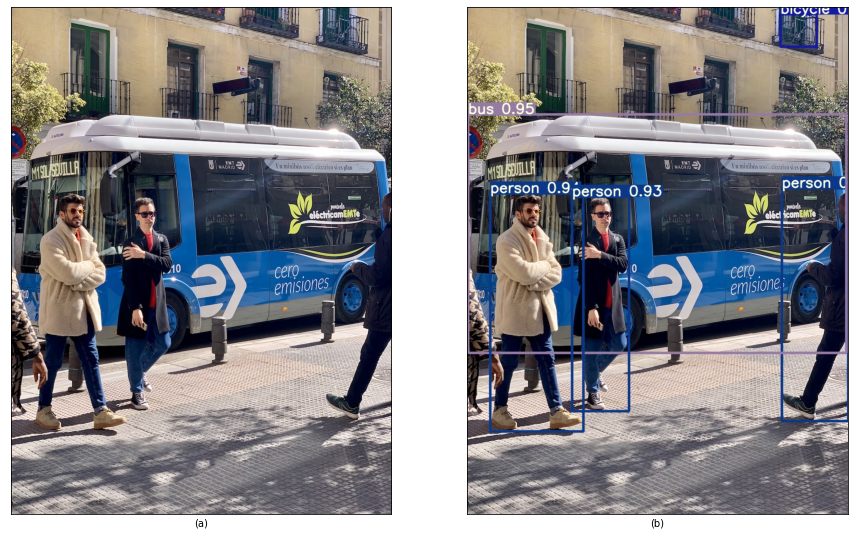

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

filename = 'test_02.jpg'
fig = plt.figure(figsize=(15,10))
rows = 1; cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(cv2.imread(os.path.join(in_path, filename)), cv2.COLOR_BGR2RGB))
ax1.set_xlabel('(a)')
ax1.set_xticks([]), ax1.set_yticks([])

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(cv2.imread(os.path.join(out_path, filename)), cv2.COLOR_BGR2RGB))
ax2.set_xlabel('(b)')
ax2.set_xticks([]), ax2.set_yticks([])

plt.show()

## **3. YOLOR 비디오 추론 (MS-COCO 데이터셋)**

In [ ]:
in_path = "dataset/videos/"
out_path = "dataset/videos/outputs/"

# Inference using YOLOR
!python yolor/detect.py --source $in_path \
                --output $out_path \
                --cfg yolor/cfg/yolor_p6.cfg \
                --weights yolor_p6.pt \
                --names yolor/data/coco.names \
                --conf 0.5 \
                --img-size 1280 \
                --device 0

Namespace(agnostic_nms=False, augment=False, cfg='yolor/cfg/yolor_p6.cfg', classes=None, conf_thres=0.5, device='0', img_size=1280, iou_thres=0.5, names='yolor/data/coco.names', output='dataset/videos/outputs/', save_txt=False, source='dataset/videos/', update=False, view_img=False, weights=['yolor_p6.pt'])
video 1/2 (1/249) /content/drive/MyDrive/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.043s)
video 1/2 (2/249) /content/drive/MyDrive/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.041s)
video 1/2 (3/249) /content/drive/MyDrive/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.039s)
video 1/2 (4/249) /content/drive/MyDrive/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.039s)
video 1/2 (5/249) /content/drive/MyDrive/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 2 cars, Done. (0.038s)
video 1/2 (6/249) /content/drive/MyDrive/yolor/dataset/videos/test_01.mp4: 768x1280 1 persons, 3 cars

Display Video Output

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/drive/MyDrive/yolor/dataset/videos/outputs/test_01.mp4"  #Get your video Here

# Compressed video path
compressed_path = "/content/drive/MyDrive/yolor/dataset/videos/outputs/test_01_comp.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.